In [176]:
import pandas as pd
df = pd.read_csv('DMSC.csv')
# 选择特定的列
df = df[['Movie_Name_CN', 'Number','Username', 'Date','Star', 'Comment', 'Like']]
df1 = df[df['Movie_Name_CN'] =="复仇者联盟"]

In [3]:
df1.head()

,Movie_Name_CN,Number,Username,Date,Star,Comment,Like
1073583,复仇者联盟,1,花生狼,2012-04-28,5,那些个说是大乱炖、狗血片的人，拜托你们闭嘴吧，你不看marvel漫画不怪你，但什么都不知道...,1297
1073584,复仇者联盟,2,LORENZO,2012-04-27,5,从头燃到尾！各种爽！各种给力！唐尼大眼睛各种吐槽！浩克裸一把还卖萌，你是天神我照摔！锤哥一...,1216
1073585,复仇者联盟,3,麦子,2012-04-23,2,纯粹狗血片，里面咋没有孙悟空、金刚葫芦娃和哪吒！,771
1073586,复仇者联盟,4,陀螺凡达可,2012-04-26,5,Hulk...Smash！！！,763
1073587,复仇者联盟,5,五色全味,2012-04-27,2,看得想睡觉，3d怎么还不死啊，纽约要被拆多少遍,652


In [18]:
import pandas as pd



# 转换日期列为日期类型
df['Date'] = pd.to_datetime(df['Date'])

# 对每部电影分别按日期进行排序并计算截至每个日期的累积平均评分
df_sorted = df.sort_values(['Movie_Name_CN', 'Date'])
df_sorted['CumulativeAverage'] = df_sorted.groupby('Movie_Name_CN')['Star'].expanding().mean().reset_index(level=0, drop=True)

df_sorted = df_sorted.reset_index(drop=True)

# 选择需要的列
df_cumulative_average = df_sorted[['Movie_Name_CN', 'Date', 'CumulativeAverage']]



In [11]:
import pandas as pd
from pyecharts.charts import Scatter3D
from pyecharts import options as opts

# 转换日期为字符串，用于图表的x轴
df_cumulative_average['DateStr'] = df_cumulative_average['Date'].dt.strftime('%Y-%m-%d')

# 电影名称转换为类别索引
df_cumulative_average['Movie_Index'] = pd.Categorical(df_cumulative_average['Movie_Name_CN']).codes

# 准备散点图数据
data = df_cumulative_average[['Movie_Index', 'DateStr', 'CumulativeAverage']].values.tolist()

# 创建3D散点图
scatter3d = (
    Scatter3D(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add(
        series_name="累积平均评分",
        data=data,
        xaxis3d_opts=opts.Axis3DOpts(type_="category", name='电影'),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", name='日期'),
        zaxis3d_opts=opts.Axis3DOpts(type_="value", name='累积平均评分'),
        grid3d_opts=opts.Grid3DOpts(width=100, height=100, depth=100),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            type_='color',
            max_=df_cumulative_average['CumulativeAverage'].max(),
            min_=df_cumulative_average['CumulativeAverage'].min(),
            range_color=['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf', '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
        )
    )
)

# 渲染图表到HTML文件中
scatter3d.render("累积平均评分随时间变化.html")


'C:\\Users\\sun\\Untitled Folder 2\\累积平均评分随时间变化.html'

In [19]:
import pandas as pd
from pyecharts.charts import Scatter3D
from pyecharts import options as opts
from pyecharts.charts import Bar3D
import pandas as pd

# 转换日期为字符串，用于图表的x轴

df_cumulative_average1=df_cumulative_average.sample(frac=1/40)
df_cumulative_average1['DateStr'] = df_cumulative_average1['Date'].dt.strftime('%Y-%m-%d')

# 电影名称转换为类别索引
df_cumulative_average1['Movie_Index'] = pd.Categorical(df_cumulative_average1['Movie_Name_CN']).codes

# 准备散点图数据
data = df_cumulative_average1[['Movie_Index', 'DateStr', 'CumulativeAverage']].values.tolist()





# 创建3D柱状图
bar3d = (
    Bar3D(init_opts=opts.InitOpts(width="1600px", height="800px"))
    .add(
        series_name="累积平均评分",
        data=data,
        xaxis3d_opts=opts.Axis3DOpts(type_="category", name='电影'),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", name='日期'),
        zaxis3d_opts=opts.Axis3DOpts(type_="value", name='累积平均评分'),
        grid3d_opts=opts.Grid3DOpts(width=100, height=100, depth=100),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            type_='color',
            max_=df_cumulative_average1['CumulativeAverage'].max(),
            min_=df_cumulative_average1['CumulativeAverage'].min(),
            range_color=['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf', '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
        )
    )
)

# 渲染图表到HTML文件中
bar3d.render("累积平均评分随时间变化的3D柱状图.html")

'C:\\Users\\sun\\Untitled Folder 2\\累积平均评分随时间变化的3D柱状图.html'

In [23]:
import pandas as pd
from pyecharts.charts import Scatter3D
from pyecharts import options as opts
from pyecharts.charts import Bar3D
import pandas as pd
import numpy as np

# 转换日期为字符串，用于图表的x轴
df_cumulative_average1=df_cumulative_average.sample(frac=1/40)

df_cumulative_average1['DateStr'] = df_cumulative_average1['Date'].dt.strftime('%Y-%m-%d')

# 电影名称转换为类别索引
df_cumulative_average1['Movie_Index'] = pd.Categorical(df_cumulative_average1['Movie_Name_CN']).codes

# 准备散点图数据
data = df_cumulative_average1[['Movie_Index', 'DateStr', 'CumulativeAverage']].values.tolist()




# 预定义一组颜色
colors = ['#FF5733', '#33FF57', '#3357FF', '#FFFF33', '#FF33FF', '#33FFFF', '#5733FF', '#FF3357']
color_mapping = {movie: colors[i % len(colors)] for i, movie in enumerate(unique_movies)}

# 创建3D柱状图
bar3d = Bar3D(init_opts=opts.InitOpts(width="1600px", height="800px"))

# 为每个电影添加数据系列

for movie in unique_movies:
    movie_data = df_cumulative_average1[df_cumulative_average1['Movie_Name_CN'] == movie]
    data = movie_data[['Movie_Index', 'DateStr', 'CumulativeAverage']].values.tolist()
    bar3d.add(
        series_name=movie,
        data=data,
        xaxis3d_opts=opts.Axis3DOpts(type_="category", name='电影'),
        yaxis3d_opts=opts.Axis3DOpts(type_="category", name='日期'),
        zaxis3d_opts=opts.Axis3DOpts(type_="value", name='累积平均评分'),
        grid3d_opts=opts.Grid3DOpts(width=100, height=100, depth=100),
        itemstyle_opts=opts.ItemStyleOpts(color=color_mapping[movie])  # 使用预定义颜色
    )

# 设置全局选项
bar3d.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(is_show=False)  # 关闭默认的视觉映射组件，因为我们自定义了颜色
)


# 渲染图表到HTML文件中
bar3d.render("累积平均评分随时间变化的3D柱状图_修改1.html")

'C:\\Users\\sun\\Untitled Folder 2\\累积平均评分随时间变化的3D柱状图_修改1.html'

In [24]:
#评论内容分析

df1


,Movie_Name_CN,Number,Username,Date,Star,Comment,Like
1073583,复仇者联盟,1,花生狼,2012-04-28,5,那些个说是大乱炖、狗血片的人，拜托你们闭嘴吧，你不看marvel漫画不怪你，但什么都不知道...,1297
1073584,复仇者联盟,2,LORENZO,2012-04-27,5,从头燃到尾！各种爽！各种给力！唐尼大眼睛各种吐槽！浩克裸一把还卖萌，你是天神我照摔！锤哥一...,1216
1073585,复仇者联盟,3,麦子,2012-04-23,2,纯粹狗血片，里面咋没有孙悟空、金刚葫芦娃和哪吒！,771
1073586,复仇者联盟,4,陀螺凡达可,2012-04-26,5,Hulk...Smash！！！,763
1073587,复仇者联盟,5,五色全味,2012-04-27,2,看得想睡觉，3d怎么还不死啊，纽约要被拆多少遍,652
...,...,...,...,...,...,...,...
1151859,复仇者联盟,84496,古伦木,2012-05-08,5,如果有生之年能看到复仇者大战正义联盟我觉得宇宙就达到和谐之境了 这么多外星人胡作非为Doc...,0
1151860,复仇者联盟,84497,xiyvanxuan,2012-05-08,4,大荧幕看效果得加1星。笑点不断，呆萌绿巨人最给力！,0
1151861,复仇者联盟,84498,西风瘦马,2012-05-08,3,最后的团战拍得不错嘛,0
1151862,复仇者联盟,84499,包子,2012-05-07,5,即使你不是美漫爱好者，哪怕只要你知道有几个叫钢铁侠、绿巨人、美国队长等等一票开挂的大仙，我...,0


In [34]:
# 查看重复的评论
duplicate_comments = df1[df1.duplicated(subset=['Comment','Username'], keep=False)]
print("重复评论数量:", duplicate_comments.shape[0])
print(duplicate_comments)

#导出以便观察重复评论的全貌
duplicate_comments.to_csv('duplicate_comments2.csv', index=False)

重复评论数量: 16
        Movie_Name_CN  Number Username        Date  Star  \
1079388         复仇者联盟    6328    [已注销]  2012-05-20     5   
1079844         复仇者联盟    6820  小帆桑真有品位  2012-05-19     4   
1079845         复仇者联盟    6821  小帆桑真有品位  2012-05-19     4   
1089027         复仇者联盟   16553     西泠 葵  2012-09-21     5   
1093696         复仇者联盟   21516     西泠 葵  2012-06-25     5   
1094277         复仇者联盟   22124    [已注销]  2012-05-18     3   
1096898         复仇者联盟   24941    [已注销]  2012-05-28     5   
1102154         复仇者联盟   30564    [已注销]  2012-05-07     4   
1102972         复仇者联盟   31438    [已注销]  2012-07-05     3   
1123401         复仇者联盟   52939     木木志珉  2014-12-06     5   
1142419         复仇者联盟   73021     木木志珉  2014-11-28     5   
1142735         复仇者联盟   73375    几世沉浮，  2014-07-26     5   
1142903         复仇者联盟   73577    几世沉浮，  2014-05-18     5   
1148567         复仇者联盟   80430    [已注销]  2012-05-12     4   
1151790         复仇者联盟   84420     jjyy  2012-05-07     5   
1151791         复仇者联盟   84421

In [35]:
# 删除重复的评论
# 删除基于'Comment'和'Username'列的重复评论，保留第一条出现的评论
df1 = df1.drop_duplicates(subset=['Comment', 'Username'])

# 检查删除后的结果
print(df1)


        Movie_Name_CN  Number    Username        Date  Star  \
1073583         复仇者联盟       1         花生狼  2012-04-28     5   
1073584         复仇者联盟       2     LORENZO  2012-04-27     5   
1073585         复仇者联盟       3          麦子  2012-04-23     2   
1073586         复仇者联盟       4       陀螺凡达可  2012-04-26     5   
1073587         复仇者联盟       5        五色全味  2012-04-27     2   
...               ...     ...         ...         ...   ...   
1151859         复仇者联盟   84496         古伦木  2012-05-08     5   
1151860         复仇者联盟   84497  xiyvanxuan  2012-05-08     4   
1151861         复仇者联盟   84498        西风瘦马  2012-05-08     3   
1151862         复仇者联盟   84499          包子  2012-05-07     5   
1151863         复仇者联盟   84500         张小强  2012-05-07     4   

                                                   Comment  Like  
1073583   那些个说是大乱炖、狗血片的人，拜托你们闭嘴吧，你不看marvel漫画不怪你，但什么都不知道...  1297  
1073584   从头燃到尾！各种爽！各种给力！唐尼大眼睛各种吐槽！浩克裸一把还卖萌，你是天神我照摔！锤哥一...  1216  
1073585                           纯粹狗血片，里面

In [28]:
# 针对Username列的缺失值，替换为“空白网名”
df['Username'] = df['Username'].fillna('空白网名')

# 查找评论内容（Comment列）缺失的行
missing_comment_values = df[df['Comment'].isnull()]

# 打印评论内容缺失的行数和具体行
print("评论内容缺失的行数:", missing_comment_values.shape[0])
print(missing_comment_values)

#  删除评论内容缺失的行
df = df.dropna(subset=['Comment'])



评论内容缺失的行数: 0
Empty DataFrame
Columns: [Movie_Name_CN, Number, Username, Date, Star, Comment, Like]
Index: []


In [36]:
# 查看无法解析为日期的行
df['Parsed_Date'] = pd.to_datetime(df['Date'], errors='coerce')
unparsed_dates = df[df['Parsed_Date'].isnull()]
print("日期格式问题的行数:", unparsed_dates.shape[0])
print(unparsed_dates)


日期格式问题的行数: 0
Empty DataFrame
Columns: [Movie_Name_CN, Number, Username, Date, Star, Comment, Like, Parsed_Date]
Index: []


In [37]:
#黑名单
spam_keywords = {
    '赚钱', '兼职', '加微信', '联系方式', '优惠', '打折', '促销', '免费领', '独家优惠',
    '点击链接', '扫码', '立减', '立得', '赠送', '注册送', '活动价', '降价', '特价',
    '官方旗舰店', '正品保证', '不满意退款', '包邮', '全场包邮', '限时抢购', '秒杀',
    '返现', '返利', '抽奖', '中奖', '领奖', '免单', '试用', '折扣码', '优惠券',
    '淘宝', '京东', '拼多多', 'V信', '微信', '扣扣', 'QQ', '旺旺', '公众号',
    '必中', '稳赚', '无风险', '保赚', '保盈', '躺赚', '赚翻', '月入过万', '日赚',
    '网赚', '彩票', '股市', '炒股', '期货', '比特币', '外汇', '金融', '投资', '理财',
    '信用卡', '借贷', '贷款', '下款快', '额度高', '利息低', '无需抵押', '不查征信',
    '广告', '推广', '营销', '合作', '品牌', '加盟', '代理', '招商', '入驻', '特邀',
    '官网', '网站', '网址', '链接', '点击', '报名', '预约', '咨询', 'www', 'http', 'https', '.com',
    '扫一扫', '长按识别', '复制', '领取', '详情', '私信', '咨询', '立即购买', '在线购买',
    '直播', '热卖', '爆款', '新品', '上新', '专利产品', '国际品牌', '官方认证', '独家发售',
    '真实案例', '真实故事', '疗效保证', '科学验证', '临床实验', '权威发布', '官方数据', '专家推荐',
    '草根', '网红', '明星', '代言', '见证', '曝光', '爆料', '内幕', '真相', '秘密', '揭秘'
}


In [63]:
###标记垃圾评论
import pandas as pd


def contains_spam(comment, spam_keywords_set, threshold=1):
    # 计算评论中出现的关键词数量
    count = sum(keyword in comment for keyword in spam_keywords_set)
    # 如果关键词数量达到阈值，则返回True
    return count >= threshold

# 应用函数，创建一个新的列 'Is_Spam'，标记是否包含至少两个垃圾信息关键词
df['Is_Spam'] = df['Comment'].apply(lambda x: contains_spam(x, spam_keywords, 1))

# 筛选出包含至少两个垃圾信息关键词的评论
spam_comments = df[df['Is_Spam']]

# 打印出这些评论，并查看它们的数量
print(spam_comments)
print("包含至少两个垃圾信息关键词的评论数量:", spam_comments.shape[0])

spam_comments.to_csv('初步筛选出的垃圾评论_阈值设定为1.csv', index=False)

        Movie_Name_CN    Number    Username       Date  Star  \
44             复仇者联盟2      45.0         张小北 2015-05-12   3.0   
64             复仇者联盟2      65.0         中二君 2015-04-23   5.0   
69             复仇者联盟2      71.0        Nina 2015-05-12   2.0   
111            复仇者联盟2     116.0       高处不胜寒 2015-05-12   3.0   
123            复仇者联盟2     128.0  taoxinxu释凡 2015-05-12   2.0   
...               ...       ...         ...        ...   ...   
2124655         疯狂动物城  140782.0         八大神 2016-03-04   5.0   
2124692         疯狂动物城  140819.0      darker 2016-03-04   5.0   
2124717         疯狂动物城  140845.0        木兎太太 2016-03-04   5.0   
2124974         疯狂动物城  141115.0       Ethel 2016-03-04   5.0   
2124977         疯狂动物城  141118.0    mmmmmdou 2016-03-07   4.0   

                                                   Comment  Like Parsed_Date  \
44        粉丝向电影+全明星阵容，还是三部曲里的第1.5部续集，直接导致细节梗太多，每个角色都要照顾...  22.0  2015-05-12   
64        我锤帅呆了！！！我队也是本命！！！还蛮想跟幻视来一发！！！捂脸···btw，奥创是个大傻逼...  11.0  2015-

In [70]:
#白名单
movie_related_keywords = {
    '复仇者联盟', '钢铁侠', '美国队长', '雷神', '索尔', '黑寡妇', '浩克', '鹰眼',
    '奇异博士', '漫威', '超级英雄', '英雄联盟', '终极一战', '无限战争', '复联',
    '斯塔克', '托尼', '史蒂夫', '罗杰斯', '布鲁斯', '班纳', '索尔·奥丁森',
    '奥创', '灭霸', '宇宙', '时间宝石', '空间宝石', '现实宝石', '灵魂宝石', 
    '力量宝石', '心灵宝石', '无限手套', '漫画改编', '尼克·弗瑞', '盾牌', '铁甲', 
    '观影体验', '特效', '续集', '剧情', '导演', '观后感', '角色', '演员', '票房',
    '剧本', 'CGI', '视觉效果', '奥斯卡', '金球奖', '电影节', '影评',
    '剧情','一星','两星','二星','三星','四星','五星','大片','优惠券','还行','电影院',
    '叙事', '基调', '沉重', '幽默', '燃点', '趣味性', '整体', '亮点', '尾灯', '任务', '一遍',
    '喜欢看', '靠谱', '角度', '妇连', '反正', '小组', '语音软件', '推荐人', '画面', '音乐', '营销',
    '宣传', '动画', '设定', '制作', '优秀', '故事', '模型', '链接', '想象力', '格局', '细节',
    '动画片', '成长', '诚意', '完成度', '动漫', '工业', '主题', '情感', '唯美', '海豚', '海棠',
    '预告', '逍遥游',
    '水军', '刷分', '真实评论', '营销号', '大V', '宣传', '公关', '炒作', '黑粉',
    '负面攻击', '推手', '舆论', '热度', '话题', '口碑', '热议', '网络推广', '网络营销',
    '影响力营销', '粉丝经济','梗',
    '大鱼海棠', '美国队长', '十二生肖', '九层妖塔', '大圣归来', '栀子花开', '夏洛特烦恼',
    '钢铁侠', '西游降魔篇', '伏妖篇', '爱乐之城', '泰囧', '何以笙箫默', '湄公河行动', '七月与安生', '后会无期', 
    '寻龙诀', '长城', '左耳', '美人鱼', '小时代', '釜山行', '变形金刚', '你的名字', '疯狂动物城',
    '托尼·斯塔克', '钢铁侠1', '美队', '绿巨人', '浩克', '黑寡妇', '雷神', '索尔', '奇异博士',
    '孙悟空', '妖塔', '齐天大圣', '默笙', '夏洛', '变形金刚', '擎天柱', '威震天',
    '大黄蜂', '萌宠', '朱迪', '尼克', '动物城', '狐狸', '兔子', '名字', '三生三世',
    '张震', '黄渤', '赵又廷', '归来', '西游', '行动', '行尸走肉', '末日求生', '列车',
    '生肖', '玉兔', '古董', '时代', '小时', '钟馗', '悟空', '梁朝伟', '小黄人',
    '乐高', '蝙蝠侠', '乐高电影', '太空', '星际', '星球大战', '美队', '奇异博士',
    '奥创','阵容','幽默','台词','此片',
    '超长版', '运动产品广告', '明星作秀', '韩国整容业广告', '机器人', '明星太多', '英雄', '戏份', '猩红女巫', 'X教授', '万磁王',
     '烂俗', '米帝','美帝','拯救世界', '团队合作', '剧情无聊', '贫嘴', '植入广告', '合作创造人', '桑塔费学派', '科幻电影',
    '能力者', '福克斯合作', '双胞胎', '幻视', 'JARVIS', '思想注入', '毁片', '基本听完', '打戏', '情感线', '字幕',
    '大boss', '彩蛋', '思维', '靠谱', 'San Diego', 'Fashion Valley', 'AMC', '国民老公', '豪华', '烂俗',
    '赚钱', '纯粹堆明星', '科技手段', '效果', '桥段', '明星', '台词', '人工智能', '互联网', '草履蟲', '机器纪元',
    '前戏', '高潮', '新人物', '全明星赛','尿点'  }

# 更新spam_comments前需要再次从df中筛选
spam_comments = df[df['Is_Spam']].copy()

# 确保评论和关键词都是小写，以便正确匹配
def recheck_spam(comment, movie_keywords_set):
    comment_lower = comment.lower()
    return not any(keyword.lower() in comment_lower for keyword in movie_keywords_set)

# 应用再次检查函数，修正误标为垃圾的评论
spam_comments['Is_Spam'] = spam_comments['Comment'].apply(lambda x: recheck_spam(x, movie_related_keywords))

# 更新原始df中的垃圾评论标记
df.update(spam_comments)

In [71]:
###查看白名单过滤后的垃圾评论
# 再次筛选出被标记为垃圾的评论
spam_comments_after = df[df['Is_Spam']]

# 打印出这些评论，并查看它们的数量
print(spam_comments_after)
print("包含至少两个垃圾信息关键词的评论数量:", spam_comments_after.shape[0])
spam_comments_after.to_csv('结合白名单后筛选出的垃圾评论_阈值设定为1.csv', index=False)

        Movie_Name_CN    Number      Username       Date  Star  \
343            复仇者联盟2     354.0           谢之艾 2015-05-25   4.0   
562            复仇者联盟2     645.0          沉默电话 2015-05-30   5.0   
1301           复仇者联盟2    1512.0  SongSongSong 2015-05-16   4.0   
4073           复仇者联盟2    4378.0            张楠 2015-05-19   5.0   
5699           复仇者联盟2    6070.0          xwei 2015-05-08   5.0   
...               ...       ...           ...        ...   ...   
2124344         疯狂动物城  140463.0     psycho DC 2016-03-04   4.0   
2124417         疯狂动物城  140537.0          娇花哈娜 2016-03-04   5.0   
2124634         疯狂动物城  140761.0        胖就会不开心 2016-03-06   5.0   
2124692         疯狂动物城  140819.0        darker 2016-03-04   5.0   
2124974         疯狂动物城  141115.0         Ethel 2016-03-04   5.0   

                                                   Comment  Like Parsed_Date  \
343                http://movie.douban.com/review/7481796/   0.0  2015-05-25   
562                                      wowwww

In [79]:
unique_movie_names = df['Movie_Name_CN'].unique()
unique_movie_names

array(['复仇者联盟2', '大鱼海棠', '美国队长3', '十二生肖', '九层妖塔', '大圣归来', '栀子花开', '夏洛特烦恼',
       '钢铁侠1', '西游降魔篇', '西游伏妖篇', '爱乐之城', '泰囧', '何以笙箫默', '湄公河行动', '七月与安生',
       '复仇者联盟', '后会无期', '寻龙诀', '长城', '左耳', '美人鱼', '小时代1', '小时代3', '釜山行',
       '变形金刚4', '你的名字', '疯狂动物城'], dtype=object)

In [75]:
###白名单关键词作用性_与初步结果对比
spam_keywords = {
    '复仇者联盟', '钢铁侠', '美国队长', '雷神', '索尔', '黑寡妇', '浩克', '鹰眼',
    '奇异博士', '漫威', '超级英雄', '英雄联盟', '终极一战', '无限战争', '复联',
    '斯塔克', '托尼', '史蒂夫', '罗杰斯', '布鲁斯', '班纳', '索尔·奥丁森',
    '奥创', '灭霸', '宇宙', '时间宝石', '空间宝石', '现实宝石', '灵魂宝石', 
    '力量宝石', '心灵宝石', '无限手套', '漫画改编', '尼克·弗瑞', '盾牌', '铁甲', 
    '观影体验', '特效', '续集', '剧情', '导演', '观后感', '角色', '演员', '票房',
    '剧本', 'CGI', '视觉效果', '奥斯卡', '金球奖', '电影节', '影评',
    '剧情','一星','两星','二星','三星','四星','五星','大片','优惠券','还行','电影院',
    '叙事', '基调', '沉重', '幽默', '燃点', '趣味性', '整体', '亮点', '尾灯', '任务', '一遍',
    '喜欢看', '靠谱', '角度', '妇连', '反正', '小组', '语音软件', '推荐人', '画面', '音乐', '营销',
    '宣传', '动画', '设定', '制作', '优秀', '故事', '模型', '链接', '想象力', '格局', '细节',
    '动画片', '成长', '诚意', '完成度', '动漫', '工业', '主题', '情感', '唯美', '海豚', '海棠',
    '预告', '逍遥游',
    '水军', '刷分', '真实评论', '营销号', '大V', '宣传', '公关', '炒作', '黑粉',
    '负面攻击', '推手', '舆论', '热度', '话题', '口碑', '热议', '网络推广', '网络营销',
    '影响力营销', '粉丝经济','梗',
    '大鱼海棠', '美国队长', '十二生肖', '九层妖塔', '大圣归来', '栀子花开', '夏洛特烦恼',
    '钢铁侠', '西游降魔篇', '伏妖篇', '爱乐之城', '泰囧', '何以笙箫默', '湄公河行动', '七月与安生', '后会无期', 
    '寻龙诀', '长城', '左耳', '美人鱼', '小时代', '釜山行', '变形金刚', '你的名字', '疯狂动物城',
    '托尼·斯塔克', '钢铁侠1', '美队', '绿巨人', '浩克', '黑寡妇', '雷神', '索尔', '奇异博士',
    '孙悟空', '妖塔', '齐天大圣', '默笙', '夏洛', '变形金刚', '擎天柱', '威震天',
    '大黄蜂', '萌宠', '朱迪', '尼克', '动物城', '狐狸', '兔子', '名字', '三生三世',
    '张震', '黄渤', '赵又廷', '归来', '西游', '行动', '行尸走肉', '末日求生', '列车',
    '生肖', '玉兔', '古董', '时代', '小时', '钟馗', '悟空', '梁朝伟', '小黄人',
    '乐高', '蝙蝠侠', '乐高电影', '太空', '星际', '星球大战', '美队', '奇异博士',
    '奥创','阵容','幽默','台词','此片',
    '超长版', '运动产品广告', '明星作秀', '韩国整容业广告', '机器人', '明星太多', '英雄', '戏份', '猩红女巫', 'X教授', '万磁王',
     '烂俗', '米帝','美帝','拯救世界', '团队合作', '剧情无聊', '贫嘴', '植入广告', '合作创造人', '桑塔费学派', '科幻电影',
    '能力者', '福克斯合作', '双胞胎', '幻视', 'JARVIS', '思想注入', '毁片', '基本听完', '打戏', '情感线', '字幕',
    '大boss', '彩蛋', '思维', '靠谱', 'San Diego', 'Fashion Valley', 'AMC', '国民老公', '豪华', '烂俗',
    '赚钱', '纯粹堆明星', '科技手段', '效果', '桥段', '明星', '台词', '人工智能', '互联网', '草履蟲', '机器纪元',
    '前戏', '高潮', '新人物', '全明星赛','尿点'
}
spam_comments_df = pd.read_csv('初步筛选出的垃圾评论_阈值设定为1.csv')

# 统计关键词出现的次数
keyword_counts = {keyword: 0 for keyword in spam_keywords}

for comment in spam_comments_df['Comment']:
    for keyword in spam_keywords:
        if keyword in comment:
            keyword_counts[keyword] += 1

# 将结果汇总到DataFrame
keyword_counts_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# 按出现次数降序排序
keyword_counts_df = keyword_counts_df.sort_values(by='Count', ascending=False)

# 显示关键词统计DataFrame
keyword_counts_df.reset_index(drop=True, inplace=True)

keyword_counts_df.to_csv('白单关键词作用性_与初步结果对比.csv', index=False)


In [73]:
###黑名单关键词作用性_与初步结果对比
spam_keywords = {
    '赚钱', '兼职', '加微信', '联系方式', '优惠', '打折', '促销', '免费领', '独家优惠',
    '点击链接', '扫码', '立减', '立得', '赠送', '注册送', '活动价', '降价', '特价',
    '官方旗舰店', '正品保证', '不满意退款', '包邮', '全场包邮', '限时抢购', '秒杀',
    '返现', '返利', '抽奖', '中奖', '领奖', '免单', '试用', '折扣码', '优惠券',
    '淘宝', '京东', '拼多多', 'V信', '微信', '扣扣', 'QQ', '旺旺', '公众号',
    '必中', '稳赚', '无风险', '保赚', '保盈', '躺赚', '赚翻', '月入过万', '日赚',
    '网赚', '彩票', '股市', '炒股', '期货', '比特币', '外汇', '金融', '投资', '理财',
    '信用卡', '借贷', '贷款', '下款快', '额度高', '利息低', '无需抵押', '不查征信',
    '广告', '推广', '营销', '合作', '品牌', '加盟', '代理', '招商', '入驻', '特邀',
    '官网', '网站', '网址', '链接', '点击', '报名', '预约', '咨询', 'www', 'http', 'https', '.com',
    '扫一扫', '长按识别', '复制', '领取', '详情', '私信', '咨询', '立即购买', '在线购买',
    '直播', '热卖', '爆款', '新品', '上新', '专利产品', '国际品牌', '官方认证', '独家发售',
    '真实案例', '真实故事', '疗效保证', '科学验证', '临床实验', '权威发布', '官方数据', '专家推荐',
    '草根', '网红', '明星', '代言', '见证', '曝光', '爆料', '内幕', '真相', '秘密', '揭秘'
}
spam_comments_df = pd.read_csv('初步筛选出的垃圾评论_阈值设定为1.csv')

# 统计关键词出现的次数
keyword_counts = {keyword: 0 for keyword in spam_keywords}

for comment in spam_comments_df['Comment']:
    for keyword in spam_keywords:
        if keyword in comment:
            keyword_counts[keyword] += 1

# 将结果汇总到DataFrame
keyword_counts_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# 按出现次数降序排序
keyword_counts_df = keyword_counts_df.sort_values(by='Count', ascending=False)

# 显示关键词统计DataFrame
keyword_counts_df.reset_index(drop=True, inplace=True)

keyword_counts_df.to_csv('黑名单关键词作用性_与初步结果对比.csv', index=False)

In [74]:
###黑名单关键词作用性_与最终结果对比
spam_keywords = {
    '赚钱', '兼职', '加微信', '联系方式', '优惠', '打折', '促销', '免费领', '独家优惠',
    '点击链接', '扫码', '立减', '立得', '赠送', '注册送', '活动价', '降价', '特价',
    '官方旗舰店', '正品保证', '不满意退款', '包邮', '全场包邮', '限时抢购', '秒杀',
    '返现', '返利', '抽奖', '中奖', '领奖', '免单', '试用', '折扣码', '优惠券',
    '淘宝', '京东', '拼多多', 'V信', '微信', '扣扣', 'QQ', '旺旺', '公众号',
    '必中', '稳赚', '无风险', '保赚', '保盈', '躺赚', '赚翻', '月入过万', '日赚',
    '网赚', '彩票', '股市', '炒股', '期货', '比特币', '外汇', '金融', '投资', '理财',
    '信用卡', '借贷', '贷款', '下款快', '额度高', '利息低', '无需抵押', '不查征信',
    '广告', '推广', '营销', '合作', '品牌', '加盟', '代理', '招商', '入驻', '特邀',
    '官网', '网站', '网址', '链接', '点击', '报名', '预约', '咨询', 'www', 'http', 'https', '.com',
    '扫一扫', '长按识别', '复制', '领取', '详情', '私信', '咨询', '立即购买', '在线购买',
    '直播', '热卖', '爆款', '新品', '上新', '专利产品', '国际品牌', '官方认证', '独家发售',
    '真实案例', '真实故事', '疗效保证', '科学验证', '临床实验', '权威发布', '官方数据', '专家推荐',
    '草根', '网红', '明星', '代言', '见证', '曝光', '爆料', '内幕', '真相', '秘密', '揭秘'
}
spam_comments_df = pd.read_csv('结合白名单后筛选出的垃圾评论_阈值设定为1.csv')

# 统计关键词出现的次数
keyword_counts = {keyword: 0 for keyword in spam_keywords}

for comment in spam_comments_df['Comment']:
    for keyword in spam_keywords:
        if keyword in comment:
            keyword_counts[keyword] += 1

# 将结果汇总到DataFrame
keyword_counts_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])

# 按出现次数降序排序
keyword_counts_df = keyword_counts_df.sort_values(by='Count', ascending=False)

# 显示关键词统计DataFrame
keyword_counts_df.reset_index(drop=True, inplace=True)

keyword_counts_df.to_csv('黑名单关键词作用性_与最终结果对比.csv', index=False)


In [ ]:
###垃圾评论可视化展示


In [3]:
from pyecharts.charts import Bar3D
from pyecharts import options as opts
import pandas as pd
from pyecharts.commons.utils import JsCode

# 加载数据集
df = pd.read_csv('结合白名单后筛选出的垃圾评论_阈值设定为1.csv')

# 按电影名称分组并计算垃圾示例数量和平均评分
grouped_df = df.groupby('Movie_Name_CN').agg({'Number': 'count', 'Star': 'mean'}).reset_index()

# 准备三维图数据，这里数据的格式需要是 [x轴, y轴, z轴]，其中z轴是垃圾示例数量
data = [
    [i, round(star, 2), counts] 
    for i, (movie, counts, star) in enumerate(zip(grouped_df['Movie_Name_CN'], grouped_df['Number'], grouped_df['Star']))
]

# 创建三维柱状图...
bar3d = Bar3D(init_opts=opts.InitOpts(width="1600px", height="800px"))

# 添加数据...
bar3d.add(
    "",
    data,
    xaxis3d_opts=opts.Axis3DOpts(type_="category", data=xaxis_data),
    yaxis3d_opts=opts.Axis3DOpts(type_="value"),
    zaxis3d_opts=opts.Axis3DOpts(type_="value"),
    grid3d_opts=opts.Grid3DOpts(
        width=100,  # 调整网格的宽度
        height=100,  # 调整网格的高度
        depth=100,  # 调整网格的深度
        rotate_speed=10,  # 调整旋转速度
        is_rotate=True  # 允许用户旋转
    )
)

# 全局设置...
bar3d.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(max_=200),  # 假设最大值为200，根据您的数据调整
    title_opts=opts.TitleOpts(title="电影垃圾示例数量与平均评分关系图")
)


# 渲染图表到文件
bar3d.render("各电影垃圾示例数量与平均评分关系图_电影名称完整显示版.html")


C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\各电影垃圾示例数量与平均评分关系图_电影名称完整显示版.html'

In [4]:
#对比分析垃圾信息平均评分和电影平均评分
df1 = pd.read_csv('结合白名单后筛选出的垃圾评论_阈值设定为1.csv')
df2 = pd.read_csv('DMSC.csv')
# 计算垃圾评论的平均评分
spam_avg_rating = df1.groupby('Movie_Name_CN')['Star'].mean().reset_index()

# 计算所有评论的平均评分
all_avg_rating = df2.groupby('Movie_Name_CN')['Star'].mean().reset_index()

# 合并两个DataFrame
merged_ratings = pd.merge(spam_avg_rating, all_avg_rating, on='Movie_Name_CN', how='inner')
merged_ratings.columns = ['Movie_Name_CN', 'Spam_Avg_Rating', 'All_Avg_Rating']

# 显示结果
merged_ratings.head()



,Movie_Name_CN,Spam_Avg_Rating,All_Avg_Rating
0,七月与安生,3.894180,3.862973
1,九层妖塔,2.326531,2.352928
2,何以笙箫默,1.640625,1.819084
3,你的名字,4.102679,4.310975
4,十二生肖,3.347150,3.473839


In [7]:
merged_ratings.to_csv('电影名_垃圾评论平均评分_所有评论平均评分.csv', index=False)

In [9]:
#电影名_垃圾评论平均评分_所有评论平均评分三维
from pyecharts.charts import Bar3D
from pyecharts import options as opts

# 准备数据，因为Bar3D需要的数据格式是一个包含多个列表的大列表，
# 每个小列表包含三个元素，分别是 x, y, z 的值
data = []
for index, row in merged_ratings.iterrows():
    # 垃圾评论平均评分
    data.append([index, 0, row['Spam_Avg_Rating']])  # Y轴的0代表垃圾评论
    # 所有评论平均评分
    data.append([index, 1, row['All_Avg_Rating']])   # Y轴的1代表所有评论

# 创建Bar3D对象
bar3d = Bar3D(init_opts=opts.InitOpts(width="1600px", height="800px"))

# 添加数据并设置各个轴的类型和名称
bar3d.add(
    series_name="评分对比",
    data=data,
    xaxis3d_opts=opts.Axis3DOpts(type_="category", data=merged_ratings['Movie_Name_CN'].tolist(), name='电影种类'),
    yaxis3d_opts=opts.Axis3DOpts(type_="category", data=["垃圾评论", "所有评论"], name='评论类型'),
    zaxis3d_opts=opts.Axis3DOpts(type_="value", name='平均评分')
)

# 设置全局配置项
bar3d.set_global_opts(
    title_opts=opts.TitleOpts(title="垃圾评论与所有评论的平均评分对比"),
    visualmap_opts=opts.VisualMapOpts(max_=5, min_=1.6)  # 假设评分范围为1到5
)

# 渲染图表到HTML文件中
bar3d.render("电影名_垃圾评论平均评分_所有评论平均评分三维.html")

C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\电影名_垃圾评论平均评分_所有评论平均评分三维.html'

In [13]:
###_电影名_日期_垃圾评论数量可视化展示
df1.head()
# 筛选出标记为垃圾评论的行
df_spam = df1[df1['Is_Spam'] == True]

# 按电影名和日期分组，计算每组的评论数量
grouped_df = df_spam.groupby(['Movie_Name_CN', 'Parsed_Date']).size().reset_index(name='Spam_Comments_Count')

grouped_df.head()
grouped_df.to_csv('电影名_日期_垃圾评论数量.csv', index=False)

In [14]:
df2 = pd.read_csv('DMSC.csv')

In [18]:
df2.head()

,ID,Movie_Name_EN,Movie_Name_CN,Crawl_Date,Number,Username,Date,Star,Comment,Like
0,0,Avengers Age of Ultron,复仇者联盟2,2017-01-22,1,然潘,2015-05-13,3,连奥创都知道整容要去韩国。,2404
1,1,Avengers Age of Ultron,复仇者联盟2,2017-01-22,2,更深的白色,2015-04-24,2,非常失望，剧本完全敷衍了事，主线剧情没突破大家可以理解，可所有的人物都缺乏动机，正邪之间、...,1231
2,2,Avengers Age of Ultron,复仇者联盟2,2017-01-22,3,有意识的贱民,2015-04-26,2,2015年度最失望作品。以为面面俱到，实则画蛇添足；以为主题深刻，实则老调重弹；以为推陈出...,1052
3,3,Avengers Age of Ultron,复仇者联盟2,2017-01-22,4,不老的李大爷耶,2015-04-23,4,《铁人2》中勾引钢铁侠，《妇联1》中勾引鹰眼，《美队2》中勾引美国队长，在《妇联2》中终于...,1045
4,4,Avengers Age of Ultron,复仇者联盟2,2017-01-22,5,ZephyrO,2015-04-22,2,虽然从头打到尾，但是真的很无聊啊。,723


In [19]:

# 按电影名和日期分组，计算每组的评论数量
grouped_df = df2.groupby(['Movie_Name_CN', 'Date']).size().reset_index(name='all_Comments_Count')

# 显示前几行以检查结果
grouped_df.head()

# 将结果保存到CSV文件
grouped_df.to_csv('电影名_日期_总评论数量.csv', index=False)

In [22]:
import pandas as pd

# 读取文件
total_comments_df = pd.read_csv('电影名_日期_总评论数量.csv')
spam_comments_df = pd.read_csv('电影名_日期_垃圾评论数量.csv')

# 确保日期列的名称相同
# 将 'Parsed_Date' 改名为 'Date'
spam_comments_df.rename(columns={'Parsed_Date': 'Date'}, inplace=True)

# 合并DataFrame
merged_df = pd.merge(total_comments_df, spam_comments_df, 
                     on=['Movie_Name_CN', 'Date'], 
                     how='left')

# 填充缺失的Spam_Comments_Count值为0
merged_df['Spam_Comments_Count'] = merged_df['Spam_Comments_Count'].fillna(0)

# 将Spam_Comments_Count列转换为整型
merged_df['Spam_Comments_Count'] = merged_df['Spam_Comments_Count'].astype(int)

# 保存结果到新的CSV文件
merged_df.to_csv('合并后的评论数据.csv', index=False)


相关系数: 0.4649980680044293


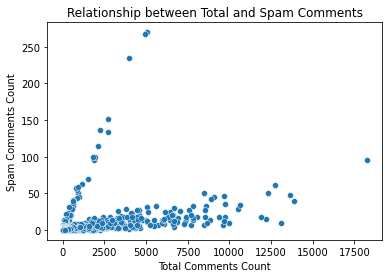

                             OLS Regression Results                            
Dep. Variable:     Spam_Comments_Count   R-squared:                       0.216
Model:                             OLS   Adj. R-squared:                  0.216
Method:                  Least Squares   F-statistic:                     5527.
Date:                 Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                         10:45:54   Log-Likelihood:                -56236.
No. Observations:                20036   AIC:                         1.125e+05
Df Residuals:                    20034   BIC:                         1.125e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0

D:\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

# 加载数据
df = pd.read_csv('合并后的评论数据.csv')

# 计算相关系数
correlation_coef, _ = pearsonr(df['all_Comments_Count'], df['Spam_Comments_Count'])
print(f"相关系数: {correlation_coef}")

# 绘制散点图
sns.scatterplot(x='all_Comments_Count', y='Spam_Comments_Count', data=df)
plt.xlabel('Total Comments Count')
plt.ylabel('Spam Comments Count')
plt.title('Relationship between Total and Spam Comments')
plt.show()

# 简单线性回归
X = df['all_Comments_Count']
y = df['Spam_Comments_Count']
X = sm.add_constant(X)  # 添加常数项
model = sm.OLS(y, X).fit()
print(model.summary())


In [35]:
from pyecharts import options as opts
from pyecharts.charts import Line
import pandas as pd

# 加载数据
df = pd.read_csv('合并后的评论数据.csv')

# 确保日期列的类型是日期格式
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

# 按日期分组并计算每天的垃圾评论和总评论数量
daily_totals = df.groupby('Date').agg({
    'Spam_Comments_Count': 'sum',
    'all_Comments_Count': 'sum'
}).reset_index()

# 创建一个折线图对象
line = Line(init_opts=opts.InitOpts(width="1600px", height="800px"))
line.add_xaxis(daily_totals['Date'].tolist())
line.add_yaxis(
    series_name="Total Comments Count",
    y_axis=daily_totals['all_Comments_Count'].tolist(),
    is_smooth=True,
    linestyle_opts=opts.LineStyleOpts(width=2, color="skyblue"),
    itemstyle_opts=opts.ItemStyleOpts(color="skyblue"),
    label_opts=opts.LabelOpts(is_show=False),
)
line.add_yaxis(
    series_name="Spam Comments Count",
    y_axis=daily_totals['Spam_Comments_Count'].tolist(),
    is_smooth=True,
    linestyle_opts=opts.LineStyleOpts(width=2, color="#ff3300"),
    label_opts=opts.LabelOpts(is_show=False),
    yaxis_index=1,
    itemstyle_opts=opts.ItemStyleOpts(color="#ff3300"),
)

# 设置全局配置项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="Trends of Total and Spam Comments Over Time"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(
        name="Total Comments Count",
        type_="value",
        min_=0,
        max_=max(daily_totals['all_Comments_Count']) * 1.1,
        axislabel_opts=opts.LabelOpts(formatter="{value}")
    )
)

# 添加第二个y轴（垃圾评论数量）
line.extend_axis(
    yaxis=opts.AxisOpts(
        name="Spam Comments Count",
        type_="value",
        min_=0,
        max_=max(daily_totals['Spam_Comments_Count']) * 1.1,
        axislabel_opts=opts.LabelOpts(formatter="{value}"),
        splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)),
    )
)

# 渲染图表到HTML文件
line.render('总评论总数对比垃圾评论总数.html')


C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\总评论总数对比垃圾评论总数.html'

In [38]:
#单个电影的总评论总数对比垃圾评论总数

from pyecharts import options as opts
from pyecharts.charts import Line
import pandas as pd

df = pd.read_csv('合并后的评论数据.csv')

# 确保日期列的类型是日期格式
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
df = df.loc[df['Movie_Name_CN'] == '复仇者联盟']
# 按日期分组并计算每天的垃圾评论和总评论数量
daily_totals = df.groupby('Date').agg({
    'Spam_Comments_Count': 'sum',
    'all_Comments_Count': 'sum'
}).reset_index()

# 创建一个折线图对象
line = Line(init_opts=opts.InitOpts(width="1600px", height="800px"))
line.add_xaxis(daily_totals['Date'].tolist())
line.add_yaxis(
    series_name="Total Comments Count",
    y_axis=daily_totals['all_Comments_Count'].tolist(),
    is_smooth=True,
    linestyle_opts=opts.LineStyleOpts(width=2, color="skyblue"),
    itemstyle_opts=opts.ItemStyleOpts(color="skyblue"),
    label_opts=opts.LabelOpts(is_show=False),
)
line.add_yaxis(
    series_name="Spam Comments Count",
    y_axis=daily_totals['Spam_Comments_Count'].tolist(),
    is_smooth=True,
    linestyle_opts=opts.LineStyleOpts(width=2, color="#ff3300"),
    label_opts=opts.LabelOpts(is_show=False),
    yaxis_index=1,
    itemstyle_opts=opts.ItemStyleOpts(color="#ff3300"),
)

# 设置全局配置项
line.set_global_opts(
    title_opts=opts.TitleOpts(title="Trends of Total and Spam Comments Over Time"),
    tooltip_opts=opts.TooltipOpts(trigger="axis"),
    xaxis_opts=opts.AxisOpts(type_="category", boundary_gap=False),
    yaxis_opts=opts.AxisOpts(
        name="Total Comments Count",
        type_="value",
        min_=0,
        max_=700,
        axislabel_opts=opts.LabelOpts(formatter="{value}")
    )
)

# 添加第二个y轴（垃圾评论数量）
line.extend_axis(
    yaxis=opts.AxisOpts(
        name="Spam Comments Count",
        type_="value",
        min_=0,
        max_=max(daily_totals['Spam_Comments_Count']) * 1.1,
        axislabel_opts=opts.LabelOpts(formatter="{value}"),
        splitline_opts=opts.SplitLineOpts(is_show=True, linestyle_opts=opts.LineStyleOpts(opacity=1)),
    )
)

# 渲染图表到HTML文件
line.render('总评论总数对比垃圾评论总数_单个电影.html')


C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\总评论总数对比垃圾评论总数_单个电影.html'

In [39]:
#评论数据分类,可分为剧情、角色、特效等不同的评价维度
df = pd.read_csv('DMSC.csv')
df = df[['Movie_Name_CN', 'Number','Username', 'Date','Star', 'Comment', 'Like']]
df1 = df[df['Movie_Name_CN'] =="复仇者联盟"]

In [42]:
df1.info()
df1.to_excel('复仇者联盟评论数据集.xlsx', index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78281 entries, 1073583 to 1151863
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie_Name_CN  78281 non-null  object
 1   Number         78281 non-null  int64 
 2   Username       78275 non-null  object
 3   Date           78281 non-null  object
 4   Star           78281 non-null  int64 
 5   Comment        78281 non-null  object
 6   Like           78281 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 4.8+ MB


In [ ]:
#剧情、角色、特效、导演和制作、演技、时长、情感和主题、比较
df1.to_excel('复仇者联盟评论数据集.xlsx', index=False)

In [43]:
df = pd.read_excel('复仇者联盟评论数据集.xlsx')

In [48]:
# 筛选出class列不为空的数据
df_not_null = df[df['class'].notna()]
# 筛选出class列为空的数据
df_null = df[df['class'].isna()]
categories = ['剧情', '角色', '特效', '导演和制作', '演技', '时长', '情感和主题', '比较']

# 为每个类别创建一个新列，并初始化为0
for category in categories:
    df_not_null[category] = 0

# 遍历DataFrame来设置标记
for index, row in df_not_null.iterrows():
    classes = row['class'].split('、')  # 假设类别之间用顿号隔开
    for cls in classes:
        if cls in categories:
            df_not_null.at[index, cls] = 1

C:\Users\sun\AppData\Local\Temp/ipykernel_23396/1827221381.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_null[category] = 0


In [53]:
df = pd.read_csv('DMSC.csv')
df = df[['Movie_Name_CN', 'Number','Username', 'Date','Star', 'Comment', 'Like']]
df1 = df[df['Movie_Name_CN'] =="复仇者联盟"]

In [60]:
#主题提取
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import jieba
import re

def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = set(file.read().splitlines())
    return stop_words

chinese_stop_words = load_stop_words("百度停用词表.txt")

comments = df1['Comment']

# 文本预处理
def preprocess(text):
    # 移除标点符号
    text = re.sub(r'[^\w\s]', '', text)
    # 使用jieba进行中文分词
    words = jieba.cut(text)
    # 移除停用词
    words = [word for word in words if word not in chinese_stop_words]
    return ' '.join(words)

# 应用文本预处理
processed_comments = comments.apply(preprocess)

# 向量化处理
vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(processed_comments)

# 定义LDA模型
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # 可以调整n_components来改变主题数量

# 训练模型
lda.fit(X)

# 显示主题关键词
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda, vectorizer.get_feature_names(), 10)

#Topic #0：与3D效果、电影院观影体验等相关的评论。
#Topic #1：似乎集中在特定的超级英雄（如绿巨人、钢铁侠）和相关的情感或风格（如喜爱、搞笑）。
#Topic #2：聚焦于超级英雄拯救地球或大片风格的主题。
#Topic #3：强调电影的娱乐性，如好看、不错、爆米花电影、剧情和特效等。
#Topic #4：围绕特定的超级英雄角色（如美国队长、钢铁侠、雷神）和他们在电影中的角色。

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\sun\AppData\Local\Temp\jieba.cache
Loading model cost 0.667 seconds.
Prefix dict has been built successfully.


Topic #0: 3d 效果 电影 电影院 imax 看过 不错 一个 片子 啊啊啊
Topic #1: 绿巨人 钢铁 喜欢 洛基 队长 搞笑 美国 联盟 可爱 英雄
Topic #2: 英雄 超级 美国 拯救 电影 地球 一个 世界 大片 外星人
Topic #3: 电影 好看 不错 爆米花 剧情 特效 场面 一部 过瘾 精彩
Topic #4: 美国 队长 大片 钢铁 雷神 鹰眼 黑寡妇 绿巨人 浩克 loki


In [61]:
##第二次主题提取
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import jieba
import re

def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = set(file.read().splitlines())
    return stop_words

chinese_stop_words = load_stop_words("百度停用词表.txt")

comments = df1['Comment']

# 文本预处理
def preprocess(text):
    # 移除标点符号
    text = re.sub(r'[^\w\s]', '', text)
    # 使用jieba进行中文分词
    words = jieba.cut(text)
    # 移除停用词
    words = [word for word in words if word not in chinese_stop_words]
    return ' '.join(words)

# 应用文本预处理
processed_comments = comments.apply(preprocess)

# 使用TF-IDF向量化
tfidf_vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(processed_comments)

# 使用调整后的参数重新训练LDA模型
lda_tfidf = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=0)
lda_tfidf.fit(X_tfidf)
# 训练模型
lda.fit(X)

# 显示主题关键词
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda, vectorizer.get_feature_names(), 10)






# 重新打印主题关键词
print_top_words(lda_tfidf, tfidf_vectorizer.get_feature_names(), 10)




Topic #0: 3d 效果 电影 电影院 imax 看过 不错 一个 片子 啊啊啊
Topic #1: 绿巨人 钢铁 喜欢 洛基 队长 搞笑 美国 联盟 可爱 英雄
Topic #2: 英雄 超级 美国 拯救 电影 地球 一个 世界 大片 外星人
Topic #3: 电影 好看 不错 爆米花 剧情 特效 场面 一部 过瘾 精彩
Topic #4: 美国 队长 大片 钢铁 雷神 鹰眼 黑寡妇 绿巨人 浩克 loki
Topic #0: 好看 英雄 超级 超级 英雄 拯救 世界 电影 幽默 商业片 地球
Topic #1: 3d 可爱 效果 电影院 imax 刺激 看着 绿巨人 可爱 3d 效果 绿巨人
Topic #2: 漫威 电影 看过 五星 真的 好萌 啊啊啊 抖森 热血沸腾 亮点
Topic #3: 钢铁 队长 美国 队长 美国 欢乐 绿巨人 loki 雷神 鹰眼 黑寡妇
Topic #4: 爆米花 电影 爆米花 电影 搞笑 睡着 精彩 很爽 场面 一部 彩蛋
Topic #5: 哈哈哈 hulk 期待 碉堡 妇联 想象 大乱斗 续集 蜘蛛侠 超人
Topic #6: 不错 绿巨人 喜欢 大片 大杂烩 英雄主义 剧情 美国 一个 3d
Topic #7: 过瘾 热闹 唐尼 罗伯特 罗伯特 唐尼 英雄 帅哥 票价 简单 很棒
Topic #8: 钢铁 浩克 特效 喜欢 感觉 绿巨人 喜欢 钢铁 斯嘉丽 美队 无敌
Topic #9: 洛基 联盟 high 第一部 hero 复仇者 一星 无尿点 复仇者 联盟 喜剧片


In [64]:
topic_distribution = lda_tfidf.transform(X_tfidf)

main_topic = topic_distribution.argmax(axis=1)

# 将主题标签添加到原始DataFrame中
df1['Topic_Label'] = main_topic

# 将数字标签转换为更具描述性的标签
topic_names = {0: '剧情', 1: '特效', 2: '角色喜爱', 3: '角色', 4: '娱乐性质',
               5: '期待', 6: '感受', 7: '唐尼', 8: '特效', 9: '特征'}
df1['Topic_Label'] = df1['Topic_Label'].map(topic_names)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78281 entries, 1073583 to 1151863
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie_Name_CN  78281 non-null  object
 1   Number         78281 non-null  int64 
 2   Username       78275 non-null  object
 3   Date           78281 non-null  object
 4   Star           78281 non-null  int64 
 5   Comment        78281 non-null  object
 6   Like           78281 non-null  int64 
 7   Topic_Label    78281 non-null  object
dtypes: int64(3), object(5)
memory usage: 5.4+ MB


C:\Users\sun\AppData\Local\Temp/ipykernel_23396/99355392.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Topic_Label'] = main_topic
C:\Users\sun\AppData\Local\Temp/ipykernel_23396/99355392.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Topic_Label'] = df1['Topic_Label'].map(topic_names)


In [63]:
df1.to_csv('评论分类结果.csv', index=False)

In [65]:
#粗略标记情感倾向
def label_sentiment(row):
    if row['Star'] >= 4:
        return 'positive'
    elif row['Star'] == 3:
        return 'neutral'
    else:
        return 'negative'

df1['Sentiment'] = df1.apply(label_sentiment, axis=1)


C:\Users\sun\AppData\Local\Temp/ipykernel_23396/1676811421.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1.apply(label_sentiment, axis=1)


In [67]:
df1.head()

,Movie_Name_CN,Number,Username,Date,Star,Comment,Like,Topic_Label,Sentiment
1073583,复仇者联盟,1,花生狼,2012-04-28,5,那些个说是大乱炖、狗血片的人，拜托你们闭嘴吧，你不看marvel漫画不怪你，但什么都不知道...,1297,感受,positive
1073584,复仇者联盟,2,LORENZO,2012-04-27,5,从头燃到尾！各种爽！各种给力！唐尼大眼睛各种吐槽！浩克裸一把还卖萌，你是天神我照摔！锤哥一...,1216,角色,positive
1073585,复仇者联盟,3,麦子,2012-04-23,2,纯粹狗血片，里面咋没有孙悟空、金刚葫芦娃和哪吒！,771,特征,negative
1073586,复仇者联盟,4,陀螺凡达可,2012-04-26,5,Hulk...Smash！！！,763,期待,positive
1073587,复仇者联盟,5,五色全味,2012-04-27,2,看得想睡觉，3d怎么还不死啊，纽约要被拆多少遍,652,特效,negative


In [69]:
import jieba
import re

def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)  # 去除标点符号
    words = jieba.cut(text)  # 分词
    return ' '.join(words)

df1['Processed_Comment'] = df1['Comment'].apply(preprocess)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.9, min_df=2)
X = vectorizer.fit_transform(df1['Processed_Comment'])
def label_sentiment(row):
    if row['Star'] >= 4:
        return 'positive'
    elif row['Star'] == 3:
        return 'neutral'
    else:
        return 'negative'

df1['Sentiment'] = df1.apply(label_sentiment, axis=1)
from sklearn.model_selection import train_test_split

y = df1['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
from sklearn.metrics import classification_report

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\sun\AppData\Local\Temp/ipykernel_23396/637854907.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Processed_Comment'] = df1['Comment'].apply(preprocess)
C:\Users\sun\AppData\Local\Temp/ipykernel_23396/637854907.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sentiment'] = df1.apply(label_sentiment, axis=1)


              precision    recall  f1-score   support

    negative       0.35      0.09      0.15       570
     neutral       0.47      0.16      0.24      3083
    positive       0.80      0.96      0.87     12004

    accuracy                           0.77     15657
   macro avg       0.54      0.41      0.42     15657
weighted avg       0.72      0.77      0.72     15657



In [70]:
df1['Predicted_Sentiment'] = classifier.predict(vectorizer.transform(df1['Processed_Comment']))


C:\Users\sun\AppData\Local\Temp/ipykernel_23396/2741365295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Predicted_Sentiment'] = classifier.predict(vectorizer.transform(df1['Processed_Comment']))


In [72]:
df1.to_csv('情感倾向预测结果.csv', index=False)

In [73]:
df1.to_excel('情感倾向预测结果.xlsx', index=False)

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

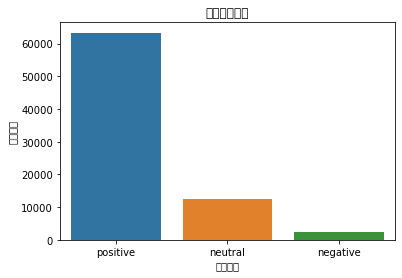

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# 统计各个情感倾向的评论数量
sentiment_counts = df1['Predicted_Sentiment'].value_counts()

# 绘制条形图
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('情感倾向分布')
plt.xlabel('情感倾向')
plt.ylabel('评论数量')
plt.show()


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

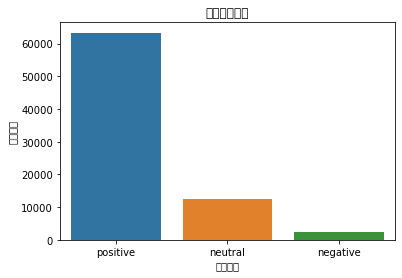

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 统计各个情感倾向的评论数量
sentiment_counts1 = df1['Sentiment'].value_counts()

# 绘制条形图
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('情感倾向分布')
plt.xlabel('情感倾向')
plt.ylabel('评论数量')
plt.show()


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20542 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

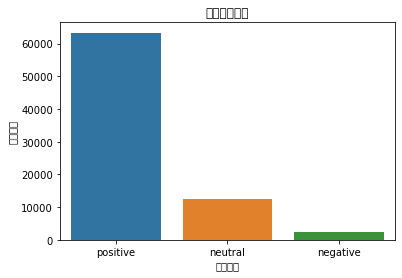

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# 统计各个情感倾向的评论数量
class_counts = df1['Topic_Label'].value_counts()

# 绘制条形图
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('情感倾向分布')
plt.xlabel('情感倾向')
plt.ylabel('评论数量')
plt.show()


In [102]:
class_counts

特效      15893
剧情      13144
角色       9469
角色喜爱     8838
感受       8479
娱乐性质     6907
唐尼       5332
期待       5213
特征       5006
Name: Topic_Label, dtype: int64

C:\Users\sun\AppData\Local\Temp/ipykernel_23396/3532055339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26102 missing from curren

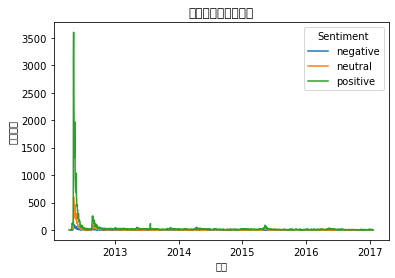

In [83]:
# 首先确保日期字段是日期类型
df1['Date'] = pd.to_datetime(df1['Date'])
# 对日期和情感进行分组统计
sentiment_over_time1 = df1.groupby([df1['Date'].dt.date, 'Predicted_Sentiment']).size().unstack()

# 绘制趋势图
sentiment_over_time.plot(kind='line')
plt.title('情感随时间变化趋势')
plt.xlabel('日期')
plt.ylabel('评论数量')
plt.show()


In [89]:
df1

,Movie_Name_CN,Number,Username,Date,Star,Comment,Like,Topic_Label,Sentiment,Processed_Comment,Predicted_Sentiment
1073583,复仇者联盟,1,花生狼,2012-04-28,5,那些个说是大乱炖、狗血片的人，拜托你们闭嘴吧，你不看marvel漫画不怪你，但什么都不知道...,1297,感受,positive,那些 个 说 是 大乱 炖 狗血 片 的 人 拜托 你们 闭嘴 吧 你 不 看 marv...,positive
1073584,复仇者联盟,2,LORENZO,2012-04-27,5,从头燃到尾！各种爽！各种给力！唐尼大眼睛各种吐槽！浩克裸一把还卖萌，你是天神我照摔！锤哥一...,1216,角色,positive,从头 燃到 尾 各种 爽 各种 给力 唐尼大 眼睛 各种 吐槽 浩克裸 一把 还 卖萌 ...,positive
1073585,复仇者联盟,3,麦子,2012-04-23,2,纯粹狗血片，里面咋没有孙悟空、金刚葫芦娃和哪吒！,771,特征,negative,纯粹 狗血 片 里面 咋 没有 孙悟空 金刚 葫芦娃 和 哪吒,neutral
1073586,复仇者联盟,4,陀螺凡达可,2012-04-26,5,Hulk...Smash！！！,763,期待,positive,HulkSmash,positive
1073587,复仇者联盟,5,五色全味,2012-04-27,2,看得想睡觉，3d怎么还不死啊，纽约要被拆多少遍,652,特效,negative,看得 想 睡觉 3d 怎么 还 不 死 啊 纽约 要 被 拆 多少 遍,negative
...,...,...,...,...,...,...,...,...,...,...,...
1151859,复仇者联盟,84496,古伦木,2012-05-08,5,如果有生之年能看到复仇者大战正义联盟我觉得宇宙就达到和谐之境了 这么多外星人胡作非为Doc...,0,角色喜爱,positive,如果 有生之年 能 看到 复仇者 大战 正义 联盟 我 觉得 宇宙 就 达到 和谐 之境...,positive
1151860,复仇者联盟,84497,xiyvanxuan,2012-05-08,4,大荧幕看效果得加1星。笑点不断，呆萌绿巨人最给力！,0,特效,positive,大 荧幕 看 效果 得加 1 星笑点 不断 呆萌 绿巨人 最给力,positive
1151861,复仇者联盟,84498,西风瘦马,2012-05-08,3,最后的团战拍得不错嘛,0,特征,neutral,最后 的 团战 拍 得 不错 嘛,neutral
1151862,复仇者联盟,84499,包子,2012-05-07,5,即使你不是美漫爱好者，哪怕只要你知道有几个叫钢铁侠、绿巨人、美国队长等等一票开挂的大仙，我...,0,剧情,positive,即使 你 不是 美漫 爱好者 哪怕 只要 你 知道 有 几个 叫 钢铁 侠 绿巨人 美国...,positive


C:\Users\sun\AppData\Local\Temp/ipykernel_23396/1280111120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'])
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 31867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22411 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38543 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26102 missing from curren

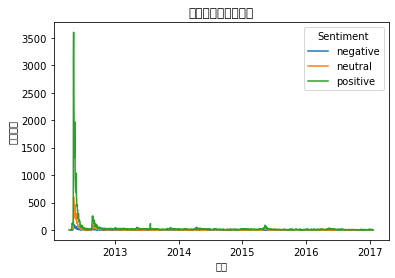

In [91]:
# 首先确保日期字段是日期类型
df1['Date'] = pd.to_datetime(df1['Date'])
# 对日期和情感进行分组统计
class_over_time = df1.groupby([df1['Date'].dt.date, 'Topic_Label']).size().unstack()



In [162]:
# 首先确保日期字段是日期类型
df1['Date'] = pd.to_datetime(df1['Date'])
# 对日期和情感进行分组统计
star_over_time = df1.groupby([df1['Date'].dt.date, 'Star']).size().unstack()



In [163]:
star_over_time

Star,1,2,3,4,5
Date,,,,,
2012-04-09,NaN,NaN,NaN,NaN,1.0
2012-04-14,NaN,NaN,NaN,NaN,1.0
2012-04-20,NaN,NaN,NaN,1.0,NaN
2012-04-21,NaN,2.0,NaN,NaN,NaN
2012-04-22,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...
2017-01-18,NaN,NaN,3.0,NaN,1.0
2017-01-19,NaN,NaN,1.0,2.0,3.0
2017-01-20,NaN,NaN,1.0,3.0,1.0


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 19981 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

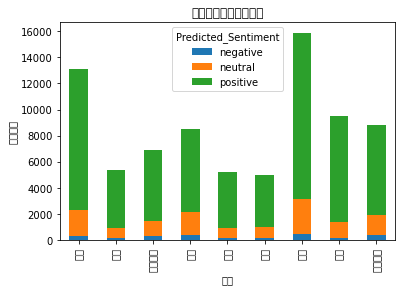

In [78]:
# 对主题标签和情感进行分组统计
topic_sentiment = df1.groupby(['Topic_Label', 'Predicted_Sentiment']).size().unstack()

# 绘制堆叠条形图
topic_sentiment.plot(kind='bar', stacked=True)
plt.title('不同主题下的情感分布')
plt.xlabel('主题')
plt.ylabel('评论数量')
plt.show()


D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 26143 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32423 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35780 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 19982 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 24773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

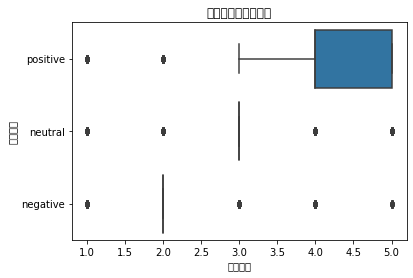

In [79]:
sns.boxplot(x='Star', y='Predicted_Sentiment', data=df1)
plt.title('星级评分与情感关系')
plt.xlabel('星级评分')
plt.ylabel('情感倾向')
plt.show()


In [80]:
topic_sentiment

Predicted_Sentiment,negative,neutral,positive
Topic_Label,,,
剧情,276,1984,10884
唐尼,158,760,4414
娱乐性质,294,1171,5442
感受,383,1731,6365
期待,140,768,4305
特征,163,788,4055
特效,444,2660,12789
角色,172,1159,8138
角色喜爱,376,1509,6953


In [81]:
sentiment_over_time

Sentiment,negative,neutral,positive
Date,,,
2012-04-09,NaN,NaN,1.0
2012-04-14,NaN,NaN,1.0
2012-04-20,NaN,NaN,1.0
2012-04-21,2.0,NaN,NaN
2012-04-22,NaN,NaN,1.0
...,...,...,...
2017-01-18,NaN,3.0,1.0
2017-01-19,NaN,1.0,5.0
2017-01-20,NaN,1.0,4.0


In [96]:

class_over_time.to_excel('各类评论随时间变化趋势1.xlsx', index=True)

In [99]:
sentiment_counts

positive    63345
neutral     12530
negative     2406
Name: Predicted_Sentiment, dtype: int64

In [100]:
sentiment_counts1

positive    59886
neutral     15409
negative     2986
Name: Sentiment, dtype: int64

In [98]:
df_emotion = pd.read_csv('情感倾向预测结果.csv')

In [114]:
import pandas as pd
from pyecharts.charts import Bar3D
from pyecharts import options as opts

# 加载数据
df_emotion = pd.read_csv('情感倾向预测结果.csv')

# 准备数据
grouped = df_emotion.groupby(['Star', 'Predicted_Sentiment']).size().reset_index(name='Counts')
stars = sorted(df_emotion['Star'].unique())
sentiments = sorted(df_emotion['Predicted_Sentiment'].unique())
data = [[stars.index(star), sentiments.index(sentiment), count] for star, sentiment, count in grouped.values]

# 创建3D条形图
bar3d = Bar3D(init_opts=opts.InitOpts(width="800px", height="600px"))
bar3d.add(
    series_name="",
    data=data,
    xaxis3d_opts=opts.Axis3DOpts(type_="category", data=stars, name="星级评分"),
    yaxis3d_opts=opts.Axis3DOpts(type_="category", data=sentiments, name="情感倾向"),
    zaxis3d_opts=opts.Axis3DOpts(type_="value", name="数量"),
)
bar3d.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(max_=grouped['Counts'].max()),
    title_opts=opts.TitleOpts(title="星级评分与情感倾向的关系"),
)
bar3d.render("星级评分与情感倾向的关系.html")


C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\星级评分与情感倾向的关系.html'

In [126]:
import pandas as pd
from pyecharts.charts import Bar3D
from pyecharts import options as opts

# 加载数据
df_emotion = pd.read_csv('情感倾向预测结果.csv')

# 准备数据
grouped = df_emotion.groupby(['Star', 'Topic_Label']).size().reset_index(name='Counts')
stars = [str(star) for star in sorted(df_emotion['Star'].unique())]  # 将星级转换为字符串
topics = sorted(df_emotion['Topic_Label'].unique())  # 获取唯一的主题标签
data = [[stars.index(str(star)), topics.index(topic), count] for star, topic, count in grouped.values]
# 创建3D条形图
bar3d = Bar3D(init_opts=opts.InitOpts(width="800px", height="800px"))  # 增加高度
bar3d.add(
    series_name="",
    data=data,
    xaxis3d_opts=opts.Axis3DOpts(type_="category", data=stars, name="星级评分"),
    yaxis3d_opts=opts.Axis3DOpts(type_="category", data=topics, name="评论分类", name_gap=1160),  # 增加name_gap
    zaxis3d_opts=opts.Axis3DOpts(type_="value", name="数量"),
)
bar3d.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(max_=grouped['Counts'].max()),
    title_opts=opts.TitleOpts(title="星级评分与评论分类的关系"),
)
bar3d.render("星级评分与分类的关系.html")




C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\星级评分与分类的关系.html'

In [122]:
sentiment_counts1.to_excel('sentiment_counts1.xlsx', index=True)
sentiment_counts.to_excel('sentiment_counts.xlsx', index=True)
class_counts.to_excel('class_counts.xlsx', index=True)
topic_sentiment.to_excel('topic_sentiment.xlsx', index=True)
sentiment_over_time.to_excel('sentiment_over_time.xlsx', index=True)
class_over_time.to_excel('class_over_time.xlsx', index=True)

In [127]:
import pandas as pd
from pyecharts.charts import Bar3D
from pyecharts import options as opts

# 加载数据
df_emotion = pd.read_csv('情感倾向预测结果.csv')

# 准备数据
grouped = df_emotion.groupby(['Predicted_Sentiment', 'Topic_Label']).size().reset_index(name='Counts')
stars = [str(star) for star in sorted(df_emotion['Predicted_Sentiment'].unique())]  # 将星级转换为字符串
topics = sorted(df_emotion['Topic_Label'].unique())  # 获取唯一的主题标签
data = [[stars.index(str(star)), topics.index(topic), count] for star, topic, count in grouped.values]
# 创建3D条形图
bar3d = Bar3D(init_opts=opts.InitOpts(width="800px", height="800px"))  # 增加高度
bar3d.add(
    series_name="",
    data=data,
    xaxis3d_opts=opts.Axis3DOpts(type_="category", data=stars, name="情感"),
    yaxis3d_opts=opts.Axis3DOpts(type_="category", data=topics, name="评论分类", name_gap=1160),  # 增加name_gap
    zaxis3d_opts=opts.Axis3DOpts(type_="value", name="数量"),
)
bar3d.set_global_opts(
    visualmap_opts=opts.VisualMapOpts(max_=grouped['Counts'].max()),
    title_opts=opts.TitleOpts(title="情感与评论分类的关系"),
)
bar3d.render("情感与分类的关系.html")




C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\情感与分类的关系.html'

In [130]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Bar, Timeline

# 加载数据
df_emotion = pd.read_csv('DMSC.csv')

# 将日期列转换为日期类型
df_emotion['Date'] = pd.to_datetime(df_emotion['Date'])

# 创建Timeline对象
timeline = Timeline(init_opts=opts.InitOpts(width="1200px", height="600px"))

# 设置自动播放时间间隔为1秒
timeline.add_schema(play_interval=1000)

# 对每部电影进行迭代
for movie in df_emotion['Movie_Name_CN'].unique():
    # 对每部电影按日期分组
    movie_data = df_emotion[df_emotion['Movie_Name_CN'] == movie]
    daily_counts = movie_data.groupby(movie_data['Date'].dt.date).size()
    
    # 创建条形图
    bar = Bar()
    bar.add_xaxis(daily_counts.index.tolist())
    bar.add_yaxis("评论数量", daily_counts.values.tolist(), label_opts=opts.LabelOpts(is_show=False))
    bar.set_global_opts(title_opts=opts.TitleOpts(title=f"《{movie}》评论时间与数量"))
    
    # 将条形图添加到Timeline
    timeline.add(bar, movie)

# 渲染为HTML文件
timeline.render("电影评论时间与数量甘特图.html")


C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\composite_charts\timeline.py:12: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型

'C:\\Users\\sun\\Untitled Folder 2\\电影评论时间与数量甘特图.html'

In [131]:
# 计算每部电影的评论时间范围
movie_ranges = df_emotion.groupby('Movie_Name_CN').agg({'Date': ['min', 'max']})
movie_ranges.columns = ['Start_Date', 'End_Date']
movie_ranges['Duration'] = (movie_ranges['End_Date'] - movie_ranges['Start_Date']).dt.days + 1

# 计算每部电影的总评论数量
movie_comment_counts = df_emotion.groupby('Movie_Name_CN')['Comment'].count()

# 合并数据
movie_data = movie_ranges.join(movie_comment_counts)
from pyecharts.charts import Bar
from pyecharts import options as opts

# 创建柱状图
bar = Bar(init_opts=opts.InitOpts(width="1200px", height="600px"))

# 添加数据
bar.add_xaxis(movie_data.index.tolist())
bar.add_yaxis("评论数量", movie_data['Comment'].tolist(), bar_width="55%")

# 设置全局选项
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="各电影评论时间范围与数量"),
    yaxis_opts=opts.AxisOpts(name="评论数量"),
    xaxis_opts=opts.AxisOpts(name="电影", axislabel_opts=opts.LabelOpts(rotate=45))
)

# 设置每个柱子的长度（时间范围）
bar.set_series_opts(
    label_opts=opts.LabelOpts(is_show=False),
    itemstyle_opts={
        "normal": {
            "color": lambda x: f'rgba(0, 0, 255, {0.1 + 0.9 * x.value / movie_data["Comment"].max()})'
        }
    }
)

# 渲染为HTML文件
bar.render("电影评论时间范围与数量.html")


C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\电影评论时间范围与数量.html'

In [135]:
# 转换日期为月份
df_emotion['Month'] = df_emotion['Date'].dt.to_period('M')

# 计算每部电影每个月的评论数量
monthly_comment_counts = df_emotion.groupby(['Movie_Name_CN', 'Month']).size().reset_index(name='Counts')
# 计算每部电影的评论时间范围
movie_ranges = monthly_comment_counts.groupby('Movie_Name_CN').agg({'Month': ['min', 'max']})
movie_ranges.columns = ['Start_Month', 'End_Month']
movie_ranges['Duration'] = (movie_ranges['End_Month'] - movie_ranges['Start_Month']).apply(lambda x: x.n)
from pyecharts.charts import Bar
from pyecharts import options as opts

# 创建柱状图
bar = Bar(init_opts=opts.InitOpts(width="1200px", height="600px"))

# 添加数据
bar.add_xaxis(movie_ranges.index.tolist())

# 设置全局选项
bar.set_global_opts(
    title_opts=opts.TitleOpts(title="各电影评论时间范围与数量（月份）"),
    yaxis_opts=opts.AxisOpts(name="评论月数"),
    xaxis_opts=opts.AxisOpts(name="电影", axislabel_opts=opts.LabelOpts(rotate=45))
)

# 设置柱子的长度（时间范围）和颜色（评论数量）
for movie in movie_ranges.index:
    start_month = movie_ranges.loc[movie, 'Start_Month']
    end_month = movie_ranges.loc[movie, 'End_Month']
    duration = movie_ranges.loc[movie, 'Duration']
    monthly_counts = monthly_comment_counts[(monthly_comment_counts['Movie_Name_CN'] == movie) &
                                           (monthly_comment_counts['Month'] >= start_month) &
                                           (monthly_comment_counts['Month'] <= end_month)]['Counts'].sum()
    color_intensity = monthly_counts / monthly_comment_counts['Counts'].max()
    bar.add_yaxis(
        movie, 
        [opts.BarItem(name=movie, value=duration, itemstyle_opts=opts.ItemStyleOpts(color=f'rgba(0, 0, 255, {color_intensity})'))], 
        label_opts=opts.LabelOpts(is_show=False)
    )

# 渲染为HTML文件
bar.render("电影评论时间范围与数量（月份）甘特图.html")


C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\电影评论时间范围与数量（月份）甘特图.html'

In [139]:
#从评论中获取电影修改建议,可以关注低评分的评论
movie_ranges
monthly_comment_counts
monthly_comment_counts.to_excel('monthly_comment_counts.xlsx', index=False)

In [138]:
#从评论中获取观众对某个角色的喜爱,找到受欢迎角色
from pyecharts.charts import Scatter
from pyecharts import options as opts

# 创建散点图
scatter = Scatter(init_opts=opts.InitOpts(width="1200px", height="600px"))

# 添加数据
for movie in movie_ranges.index:
    start_month = movie_ranges.loc[movie, 'Start_Month'].ordinal
    duration = movie_ranges.loc[movie, 'Duration']
    monthly_counts = monthly_comment_counts[(monthly_comment_counts['Movie_Name_CN'] == movie)]['Counts'].sum()
    size = (monthly_counts / monthly_comment_counts['Counts'].max()) * 20  # 计算点的大小
    scatter.add_xaxis([start_month])
    scatter.add_yaxis(movie, [(start_month, duration)], symbol_size=size)

# 设置全局选项
scatter.set_global_opts(
    title_opts=opts.TitleOpts(title="各电影评论时间范围与数量"),
    yaxis_opts=opts.AxisOpts(name="评论月数"),
    xaxis_opts=opts.AxisOpts(name="开始月份", type_="value"),
    visualmap_opts=opts.VisualMapOpts(
        type_="size", max_=20, min_=5, is_piecewise=True
    )
)

# 渲染为HTML文件
scatter.render("电影评论时间范围与数量散点图.html")


C:\Users\sun\AppData\Roaming\Python\Python39\site-packages\pyecharts\charts\chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


'C:\\Users\\sun\\Untitled Folder 2\\电影评论时间范围与数量散点图.html'

In [148]:
#从评论中获取热词来设计标语

df_a1 = pd.read_excel('商务数据分析1.xlsx')
df_a2 = pd.read_excel('商务数据分析2.xlsx')
df_a1['Date'] = pd.to_datetime(df_a1['Date'])
df_a1 = df_a1.set_index('Date')

df_a2['Date'] = pd.to_datetime(df_a2['Date'])
df_a2 = df_a2.set_index('Date')
# 对df_a1按月份求和
monthly_sum_a3 = star_over_time.resample('M').sum()

# 对df_a2按月份求和
monthly_sum_a2 = df_a2.resample('M').sum()
# 将索引转换为年-月格式的字符串
monthly_sum_a1.index = monthly_sum_a1.index.strftime('%Y-%m')
monthly_sum_a2.index = monthly_sum_a2.index.strftime('%Y-%m')
monthly_sum_a1.to_excel('商务数据分析a1.xlsx', index=True)
monthly_sum_a2.to_excel('商务数据分析a2.xlsx', index=True)

In [168]:
df1

,Movie_Name_CN,Number,Username,Date,Star,Comment,Like
1073583,复仇者联盟,1,花生狼,2012-04-28,5,那些个说是大乱炖、狗血片的人，拜托你们闭嘴吧，你不看marvel漫画不怪你，但什么都不知道...,1297
1073584,复仇者联盟,2,LORENZO,2012-04-27,5,从头燃到尾！各种爽！各种给力！唐尼大眼睛各种吐槽！浩克裸一把还卖萌，你是天神我照摔！锤哥一...,1216
1073585,复仇者联盟,3,麦子,2012-04-23,2,纯粹狗血片，里面咋没有孙悟空、金刚葫芦娃和哪吒！,771
1073586,复仇者联盟,4,陀螺凡达可,2012-04-26,5,Hulk...Smash！！！,763
1073587,复仇者联盟,5,五色全味,2012-04-27,2,看得想睡觉，3d怎么还不死啊，纽约要被拆多少遍,652
...,...,...,...,...,...,...,...
1151859,复仇者联盟,84496,古伦木,2012-05-08,5,如果有生之年能看到复仇者大战正义联盟我觉得宇宙就达到和谐之境了 这么多外星人胡作非为Doc...,0
1151860,复仇者联盟,84497,xiyvanxuan,2012-05-08,4,大荧幕看效果得加1星。笑点不断，呆萌绿巨人最给力！,0
1151861,复仇者联盟,84498,西风瘦马,2012-05-08,3,最后的团战拍得不错嘛,0
1151862,复仇者联盟,84499,包子,2012-05-07,5,即使你不是美漫爱好者，哪怕只要你知道有几个叫钢铁侠、绿巨人、美国队长等等一票开挂的大仙，我...,0


In [172]:
df1

,Movie_Name_CN,Number,Username,Date,Star,Comment,Like
1073583,复仇者联盟,1,花生狼,2012-04-28,5,那些个说是大乱炖、狗血片的人，拜托你们闭嘴吧，你不看marvel漫画不怪你，但什么都不知道...,1297
1073584,复仇者联盟,2,LORENZO,2012-04-27,5,从头燃到尾！各种爽！各种给力！唐尼大眼睛各种吐槽！浩克裸一把还卖萌，你是天神我照摔！锤哥一...,1216
1073585,复仇者联盟,3,麦子,2012-04-23,2,纯粹狗血片，里面咋没有孙悟空、金刚葫芦娃和哪吒！,771
1073586,复仇者联盟,4,陀螺凡达可,2012-04-26,5,Hulk...Smash！！！,763
1073587,复仇者联盟,5,五色全味,2012-04-27,2,看得想睡觉，3d怎么还不死啊，纽约要被拆多少遍,652
...,...,...,...,...,...,...,...
1151859,复仇者联盟,84496,古伦木,2012-05-08,5,如果有生之年能看到复仇者大战正义联盟我觉得宇宙就达到和谐之境了 这么多外星人胡作非为Doc...,0
1151860,复仇者联盟,84497,xiyvanxuan,2012-05-08,4,大荧幕看效果得加1星。笑点不断，呆萌绿巨人最给力！,0
1151861,复仇者联盟,84498,西风瘦马,2012-05-08,3,最后的团战拍得不错嘛,0
1151862,复仇者联盟,84499,包子,2012-05-07,5,即使你不是美漫爱好者，哪怕只要你知道有几个叫钢铁侠、绿巨人、美国队长等等一票开挂的大仙，我...,0


In [167]:
#用户聚类分析
star_over_time

Star,1,2,3,4,5
Date,,,,,
2012-04-09,NaN,NaN,NaN,NaN,1.0
2012-04-14,NaN,NaN,NaN,NaN,1.0
2012-04-20,NaN,NaN,NaN,1.0,NaN
2012-04-21,NaN,2.0,NaN,NaN,NaN
2012-04-22,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...
2017-01-18,NaN,NaN,3.0,NaN,1.0
2017-01-19,NaN,NaN,1.0,2.0,3.0
2017-01-20,NaN,NaN,1.0,3.0,1.0


In [150]:
import pandas as pd
df = pd.read_csv('DMSC.csv')
# 选择特定的列
df = df[['Movie_Name_CN', 'Number','Username', 'Date','Star', 'Comment', 'Like']]
df1 = df[df['Movie_Name_CN'] =="复仇者联盟"]

D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38081 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 32654 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38431 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda\lib\site-package

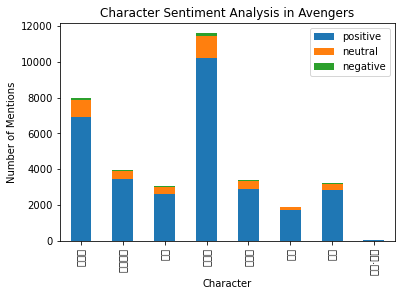

In [205]:
import pandas as pd
import matplotlib.pyplot as plt


df1 = pd.read_excel('情感倾向预测结果.xlsx')

character_aliases = {
    "钢铁侠": ["小罗伯特·唐尼", "托尼·斯塔克", "托尼", "唐尼", "铁人","钢铁侠"],
    "美国队长": ["克里斯·埃文斯", "史蒂芬·罗杰斯", "史蒂夫·罗杰斯", "美队", "罗杰斯", "埃文斯","美国队长"],
    "雷神": ["克里斯·海姆斯沃斯", "索尔·奥丁森", "索尔", "海姆斯沃斯","雷神"],
    "绿巨人": ["马克·鲁弗洛", "布鲁斯·班纳", "班纳", "浩克","绿巨人", "鲁弗洛"],
    "黑寡妇": ["斯嘉丽·约翰逊", "娜塔莎·罗曼诺夫", "娜塔莎", "罗曼诺夫", "斯嘉丽","黑寡妇","寡妇","汤包"],
    "鹰眼": ["杰瑞米·雷纳", "克莱特·巴顿", "巴顿", "雷纳","鹰眼"],
    "洛基": ["汤姆·希德勒斯顿", "洛基·劳斐森", "劳斐森", "希德勒斯顿","洛基","抖森","丁小基","基妹"],
    "尼克·弗瑞": ["塞缪尔·杰克逊", "尼古拉斯·约瑟夫·弗瑞", "弗瑞", "杰克逊"]
}

# 反转映射表，用于查找角色的标准名称
reverse_aliases = {alias: standard for standard, aliases in character_aliases.items() for alias in aliases}

# 标准化评论中的角色提及
def standardize_character_mentions(comment):
    for alias in reverse_aliases:
        if alias in comment:
            comment = comment.replace(alias, reverse_aliases[alias])
    return comment

# 应用标准化函数
df1['Standardized_Comment'] = df1['Comment'].apply(standardize_character_mentions)

# 统计每个角色的情感提及次数
character_sentiments = {character: {'positive': 0, 'neutral': 0, 'negative': 0} for character in character_aliases}

for character in character_aliases:
    for sentiment in ['positive', 'neutral', 'negative']:
        # 对于每个角色和情感类型，计算提及次数
        character_sentiments[character][sentiment] = df1[
            (df1['Standardized_Comment'].str.contains(character)) & 
            (df1['Predicted_Sentiment'] == sentiment)
        ].shape[0]

# 转换为DataFrame进行可视化
df_character_sentiments = pd.DataFrame(character_sentiments).T

# 绘制条形图
df_character_sentiments.plot(kind='bar', stacked=True)
plt.xlabel('Character')
plt.ylabel('Number of Mentions')
plt.title('Character Sentiment Analysis in Avengers')
plt.show()


In [206]:
df_character_sentiments
df_character_sentiments.to_excel('最受喜爱角色1.xlsx', index=True)

In [214]:
# 创建DataFrame来存储角色映射信息
character_mapping_data = {
    'Character': [],
    'Alias': []
}
character_aliases = {
"悬疑":["谜团", "不确定", "迷雾", "悬念", "疑问", "悬疑", "神秘", "难解", "复杂"],
"浪漫":["爱情", "情感", "恋爱", "情侣", "甜蜜", "浪漫", "温馨", "感人", "情节"],
"冒险":["探险", "旅行", "勇敢", "探索", "奇遇", "冒险", "刺激", "探险家", "英勇"],
"幽默":["幽默", "搞笑", "笑料", "欢乐", "娱乐", "喜剧", "幸福", "滑稽", "有趣"],
"动作":["打斗", "追逐", "激烈", "爆炸", "速度", "动作", "紧张", "冲突", "战斗"],
"惊悚":["恐怖", "紧张", "恐惧", "惊吓", "悬念", "惊悚", "惊险", "阴森", "紧迫"],
"科幻":["未来", "外星", "科技", "幻想", "超自然", "科幻", "创新", "探索", "奇迹"],
"剧情":["故事", "情节", "角色", "剧情发展", "冲突", "剧情", "叙述", "情感", "发展"],
"奇幻":["魔法", "神话", "传说", "幻境", "奇异", "奇幻", "梦幻", "非现实", "神秘"],
"悲剧":["悲伤", "失落", "痛苦", "哀伤", "悲哀", "悲剧", "心痛", "悲惨", "苦难"],
"演技":["表演", "演绎", "角色塑造", "表情", "情感表达", "演技", "演出", "扮演", "塑造"],
"视觉效果":["特效", "视觉", "美术设计", "摄影", "画面", "视觉效果", "效果", "视觉冲击", "美学"],
"音乐与音效":["配乐", "背景音乐", "音效", "声音设计", "原声", "音乐", "旋律", "节奏", "声响"],
"导演":["导演", "执导", "视角", "风格", "导演风格", "创作", "监督", "导演作品", "指导"],
"情感反应":["感动", "震撼", "启发", "共鸣", "情感反应", "感受", "情绪", "心灵触动", "共感"]
}
# 填充DataFrame数据
for character, aliases in character_aliases.items():
    for alias in aliases:
        character_mapping_data['Character'].append(character)
        character_mapping_data['Alias'].append(alias)

# 转换为DataFrame
df_character_aliases = pd.DataFrame(character_mapping_data)

# 将DataFrame写入Excel文件
df_character_aliases.to_excel('最受欢迎的元素.xlsx', index=False)

In [210]:
###最受欢迎的元素
import pandas as pd
import matplotlib.pyplot as plt


df1 = pd.read_excel('情感倾向预测结果.xlsx')

character_aliases = {
"悬疑":["谜团", "不确定", "迷雾", "悬念", "疑问", "悬疑", "神秘", "难解", "复杂"],
"浪漫":["爱情", "情感", "恋爱", "情侣", "甜蜜", "浪漫", "温馨", "感人", "情节"],
"冒险":["探险", "旅行", "勇敢", "探索", "奇遇", "冒险", "刺激", "探险家", "英勇"],
"幽默":["幽默", "搞笑", "笑料", "欢乐", "娱乐", "喜剧", "幸福", "滑稽", "有趣"],
"动作":["打斗", "追逐", "激烈", "爆炸", "速度", "动作", "紧张", "冲突", "战斗"],
"惊悚":["恐怖", "紧张", "恐惧", "惊吓", "悬念", "惊悚", "惊险", "阴森", "紧迫"],
"科幻":["未来", "外星", "科技", "幻想", "超自然", "科幻", "创新", "探索", "奇迹"],
"剧情":["故事", "情节", "角色", "剧情发展", "冲突", "剧情", "叙述", "情感", "发展"],
"奇幻":["魔法", "神话", "传说", "幻境", "奇异", "奇幻", "梦幻", "非现实", "神秘"],
"悲剧":["悲伤", "失落", "痛苦", "哀伤", "悲哀", "悲剧", "心痛", "悲惨", "苦难"],
"演技":["表演", "演绎", "角色塑造", "表情", "情感表达", "演技", "演出", "扮演", "塑造"],
"视觉效果":["特效", "视觉", "美术设计", "摄影", "画面", "视觉效果", "效果", "视觉冲击", "美学"],
"音乐与音效":["配乐", "背景音乐", "音效", "声音设计", "原声", "音乐", "旋律", "节奏", "声响"],
"导演":["导演", "执导", "视角", "风格", "导演风格", "创作", "监督", "导演作品", "指导"],
"情感反应":["感动", "震撼", "启发", "共鸣", "情感反应", "感受", "情绪", "心灵触动", "共感"]
}

# 反转映射表，用于查找角色的标准名称
reverse_aliases = {alias: standard for standard, aliases in character_aliases.items() for alias in aliases}

# 标准化评论中的角色提及
def standardize_character_mentions(comment):
    for alias in reverse_aliases:
        if alias in comment:
            comment = comment.replace(alias, reverse_aliases[alias])
    return comment

# 应用标准化函数
df1['Standardized_Comment'] = df1['Comment'].apply(standardize_character_mentions)

# 统计每个角色的情感提及次数
character_sentiments = {character: {'positive': 0, 'neutral': 0, 'negative': 0} for character in character_aliases}

for character in character_aliases:
    for sentiment in ['positive', 'neutral', 'negative']:
        # 对于每个角色和情感类型，计算提及次数
        character_sentiments[character][sentiment] = df1[
            (df1['Standardized_Comment'].str.contains(character)) & 
            (df1['Predicted_Sentiment'] == sentiment)
        ].shape[0]

# 转换为DataFrame进行可视化
df_character_sentiments = pd.DataFrame(character_sentiments).T



In [216]:

df_character_sentiments.to_excel('最受欢迎的元素.xlsx', index=True)

In [175]:
import pandas as pd



# 将日期转换为年月格式
df1['Date'] = pd.to_datetime(df1['Date']).dt.to_period('M')

# 分组计算每个月每个评分的评论数量
result_df = df1.groupby(['Date', 'Star']).size().reset_index(name='CommentCount')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   Date          4 non-null      period[M]
 1   Star          4 non-null      int64    
 2   CommentCount  4 non-null      int64    
dtypes: int64(2), period[M](1)
memory usage: 224.0 bytes


In [154]:
import pandas as pd

# 读取数据
df = pd.read_excel('monthly_comment_counts.xlsx')




In [180]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import HeatMap


# 将月份转换为日期类型以进行排序
df['Month'] = pd.to_datetime(df['Month'])

# 按月份排序
df.sort_values('Month', inplace=True)

# 确保电影名称和月份都是有序的列表
movie_names = df['Movie_Name_CN'].unique().tolist()
months = df['Month'].dt.strftime('%Y-%m').unique().tolist()  # 格式化为YYYY-MM字符串

# 数据转换为热力图格式
data = [[months.index(month.strftime('%Y-%m')), movie_names.index(movie), count]
        for movie, month, count in df[['Movie_Name_CN', 'Month', 'Counts']].values]

# 创建热力图
heatmap = HeatMap(init_opts=opts.InitOpts(width="1200px", height="800px"))
heatmap.add_xaxis(months)
heatmap.add_yaxis("Movie Count", movie_names, data)
heatmap.set_global_opts(
    title_opts=opts.TitleOpts(title="电影评论热力图"),
    visualmap_opts=opts.VisualMapOpts(min_=0, max_=df['Counts'].max()),
    xaxis_opts=opts.AxisOpts(type_="category", name_rotate=45, name="月份"),
    yaxis_opts=opts.AxisOpts(type_="category", name="电影名称")
)

# 渲染热力图
heatmap.render("电影评论热力图.html")


KeyError: 'Month'

In [185]:
import pandas as pd
df = pd.read_csv('DMSC.csv')



# 将日期列转换为年-月格式
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

print(df)
df.info()

              ID           Movie_Name_EN Movie_Name_CN  Crawl_Date  Number  \
0              0  Avengers Age of Ultron        复仇者联盟2  2017-01-22       1   
1              1  Avengers Age of Ultron        复仇者联盟2  2017-01-22       2   
2              2  Avengers Age of Ultron        复仇者联盟2  2017-01-22       3   
3              3  Avengers Age of Ultron        复仇者联盟2  2017-01-22       4   
4              4  Avengers Age of Ultron        复仇者联盟2  2017-01-22       5   
...          ...                     ...           ...         ...     ...   
2125051  2125051                Zootopia         疯狂动物城  2017-01-04  141196   
2125052  2125052                Zootopia         疯狂动物城  2017-01-04  141197   
2125053  2125053                Zootopia         疯狂动物城  2017-01-04  141198   
2125054  2125054                Zootopia         疯狂动物城  2017-01-04  141199   
2125055  2125055                Zootopia         疯狂动物城  2017-01-04  141200   

        Username       Date  Star  \
0             然潘 2015-05-1

In [194]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

# 提取年份和月份，并创建一个新的列
df['Month'] = df['Date'].dt.to_period('M')

# 按电影名称和月份分组，并对数量求和
df_grouped = df.groupby(['Movie_Name_CN', 'Month'])['Star'].size().reset_index()

# 将Month转换回字符串格式以方便显示
df_grouped['Month'] = df_grouped['Month'].dt.strftime('%Y-%m')

# 显示处理后的DataFrame
df_grouped.info()
df_grouped.to_excel('所有电影评论按月份计数.xlsx', index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie_Name_CN  700 non-null    object
 1   Month          700 non-null    object
 2   Star           700 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 16.5+ KB


In [158]:

df = pd.read_excel('商务数据分析a2.xlsx')
# 将日期列转换为日期时间对象
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# 使用melt函数转换数据格式
melted_df = pd.melt(df, id_vars=['Date'], var_name='Sentiment', value_name='Value')
melted_df.to_excel('melted_df.xlsx', index=False)
# 打印转换后的数据框
print(melted_df)

          Date Sentiment  Value
0   2012-04-01  negative     18
1   2012-05-01  negative   1296
2   2012-06-01  negative    153
3   2012-07-01  negative     41
4   2012-08-01  negative    170
..         ...       ...    ...
169 2016-09-01  positive    160
170 2016-10-01  positive    134
171 2016-11-01  positive    135
172 2016-12-01  positive    163
173 2017-01-01  positive    144

[174 rows x 3 columns]


In [179]:
result_df.to_excel('result_df.xlsx', index=True)

In [178]:
import pandas as pd


# 将日期转换为年月格式
df1['Date'] = pd.to_datetime(df1['Date']).dt.to_period('M')

# 分组计算每个月每个评分的评论数量
result_df = df1.groupby(['Date', 'Star']).size().reset_index(name='CommentCount')

# 显示结果
result_df



TypeError: Passing PeriodDtype data is invalid. Use `data.to_timestamp()` instead